# Autograd

**torch.autograd is an engine for computing vector-Jacobian product** \
**It computes partial derivates while applying the chain rule**

In [ ]:
import torch

## Model with scalar output

In [ ]:
# requires_grad = True -> tracks all operations on the tensor. 
x = torch.randn(3, requires_grad=True)
y = x + 2

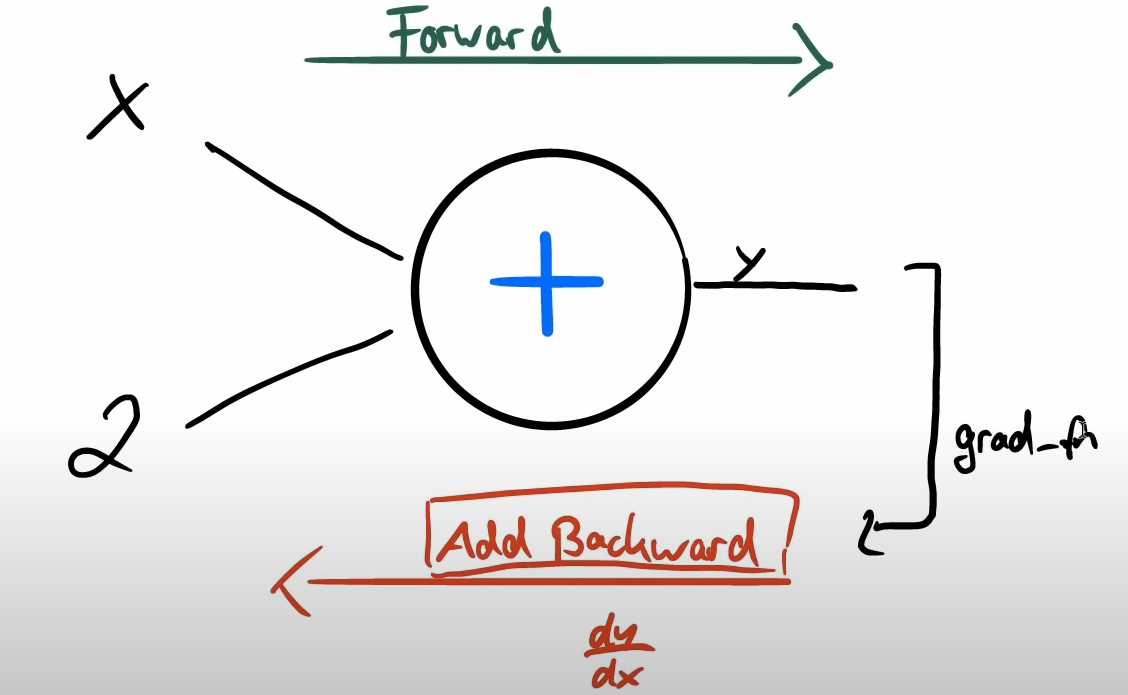

In [ ]:
# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor

print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

#AddBarckward: reference addition of the gradient

tensor([ 1.0828,  0.2468, -0.5530], requires_grad=True)
tensor([3.0828, 2.2468, 1.4470], grad_fn=<AddBackward0>)


In [ ]:
# Do more operations on y
z = y * y * 3
print(z)
#MulBackward0 = refenrece multiplication of the gradient

z = z.mean()
print("In this case, the output size is 1")
print(z)

#MeanBackward0 = refenrece mean of the gradient



tensor([56997896.0000,  9920726.0000,   284258.1875], grad_fn=<MulBackward0>)
In this case, the output size is 1
tensor(22400960., grad_fn=<MeanBackward0>)


In [ ]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

z.backward() # calculate the gradient of "z" respect to "x"
print(x.grad) # dz/dx

#ONLY one output, just call the function z.backward 


tensor([6.1655, 4.4936, 2.8941])


##  Model with non-scalar output

In [ ]:
# If a Tensor is non-scalar (more than 1 elements), we need to specify arguments for backward() 
# specify a gradient argument that is a tensor of matching shape.
# needed for vector-Jacobian product

x = torch.randn(3, requires_grad=True)

y = x * 2
for _ in range(10):
    y = y * 2

print(y)
print(y.shape)
print("In this case, the output size is 3")

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

tensor([ 2558.8127, -1272.9709,   950.2750], grad_fn=<MulBackward0>)
torch.Size([3])
In this case, the output size is 3
tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


## Stop a tensor from tracking history

  For example during our training loop when we want to update our weights \
  then this update operation should not be part of the gradient computation \
  this can be possible with 3 methods:
  - x.requires_grad_(False)
  - x.detach()
  - wrap in 'with torch.no_grad():'

In [ ]:
# .requires_grad_(...) changes an existing flag in-place.


a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad
      )
b = ((a * 3) / (a - 1))
print(b.grad_fn)

# Modify the variable in place with the "_" (requires_grad_(False))
a.requires_grad_(False)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)


True
False
None


In [ ]:
# .detach(): get a new Tensor with the same content but no gradient computation:

a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)

# Create a tensor "b" with the same values of "a" but with out the requeries gradient.
b = a.detach()
print(b.requires_grad)


True
False


In [ ]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
False


## backward() accumulates the gradient for this tensor into .grad attribute.

In [ ]:
weights = torch.ones(4, requires_grad=True)

#Training loop
for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)

print("It's important, empty the gradients before a new optimization step!")
weights.grad.zero_()

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
  
    print(weights.grad)
    # this is important! It affects the final weights & output
    # To empty the gradient
    weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
It's important, empty the gradients before a new optimization step!
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
# Use .zero_() to empty the gradients before a new optimization step!
weights = torch.ones(4, requires_grad=True)

#Training loop
for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # this is important! It affects the final weights & output
    weights.grad.zero_()

print(weights)
print(model_output)

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([0.1000, 0.1000, 0.1000, 0.1000], requires_grad=True)
tensor(4.8000, grad_fn=<SumBackward0>)


# Backpropagation

In [ ]:
import torch

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)


tensor(1., grad_fn=<PowBackward0>)


In [ ]:
# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

tensor(-2.)


In [ ]:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# Always zero the gradients
w.grad.zero_()

tensor(0.)

# Gradient Descent

## Gradientdescent Manually

In [ ]:
import numpy as np


# The prediction is 2 times the input : f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# J = MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x(w*x - y)
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    
    # calculate gradients
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(15):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 30.000


## Gradientdescent Auto

In [ ]:

import torch


# The prediction is 2 times the input : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad=True)


# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# J = MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x(w*x - y)

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    
    # calculate gradients = "backward pass"
    l.backward()  #dl/dw

    # update weights
    with torch.no_grad():
      # w = w - lr*w.grad
      w -= learning_rate * w.grad
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(7):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 14.000


# Training pipeline

- Prediction model
- Gradient computation
- Loss computation
- Parameter updates


## Training
1) Design model (Input, Output size, foward pass) \
2) Contruct loss and optimizer \
3) Training loop: 
  - foward pass: compute prediction
  - backward pass: gradients
  - update weights

## Manualy forward

In [ ]:
import torch
import torch.nn as nn

# The prediction is 2 times the input : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype= torch.float32, requires_grad=True)


# model output
def forward(x):
    return w * x


# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss() 
optimizer = torch.optim.SGD([w], lr=learning_rate)

print(f'Prediction before training: f(5) = {forward(5):.3f}')

for epoch in range(n_iters):
  # Prediction: forward pass
  y_pred = forward(X)
  # Loss
  l = loss(Y, y_pred)
  # Calculate gradient: Backward pass
  l.backward()
  # Update Weights
  optimizer.step()
  # Zero the gradients after updating
  optimizer.zero_grad()

  if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000
epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward0>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward0>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward0>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward0>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward0>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward0>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward0>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward0>)
epoch  

## Autmatic Forward

In [ ]:
import torch
import torch.nn as nn

# The prediction is 2 times the input : f = 2 * x
# Now the input and output size are 2-D
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
x_test = torch.tensor([5], dtype=torch.float32)


n_samples, n_features = X.shape
input_size = n_features
output_size = n_features


print(n_samples, n_features)

# create the model with the imput and output sizes
model = nn.Linear(input_size, output_size)


# Training
learning_rate = 0.01
n_iters = 200

loss = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

for epoch in range(n_iters):
  # Prediction: forward pass
  y_pred = model(X)
  # Loss
  l = loss(Y, y_pred)
  # Calculate gradient: Backward pass
  l.backward()
  # Update Weights
  optimizer.step()
  # Zero the gradients after updating
  optimizer.zero_grad()

  if epoch % 20 == 0:
        [w, b] = model.parameters()
        print('epoch ', epoch, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')


4 1
Prediction before training: f(5) = -2.438
epoch  0 : w =  0.018365822732448578  loss =  tensor(49.5199, grad_fn=<MseLossBackward0>)
epoch  20 : w =  1.8926233053207397  loss =  tensor(0.0380, grad_fn=<MseLossBackward0>)
epoch  40 : w =  1.944380521774292  loss =  tensor(0.0043, grad_fn=<MseLossBackward0>)
epoch  60 : w =  1.948795199394226  loss =  tensor(0.0038, grad_fn=<MseLossBackward0>)
epoch  80 : w =  1.9518060684204102  loss =  tensor(0.0034, grad_fn=<MseLossBackward0>)
epoch  100 : w =  1.954612135887146  loss =  tensor(0.0030, grad_fn=<MseLossBackward0>)
epoch  120 : w =  1.9572540521621704  loss =  tensor(0.0027, grad_fn=<MseLossBackward0>)
epoch  140 : w =  1.9597418308258057  loss =  tensor(0.0024, grad_fn=<MseLossBackward0>)
epoch  160 : w =  1.962085247039795  loss =  tensor(0.0021, grad_fn=<MseLossBackward0>)
epoch  180 : w =  1.964292049407959  loss =  tensor(0.0019, grad_fn=<MseLossBackward0>)
Prediction before training: f(5) = 9.931


## Creating a class with LinearRegression

In [ ]:
import torch
import torch.nn as nn

# The prediction is 2 times the input : f = 2 * x
# Now the input and output size are 2-D
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
x_test = torch.tensor([5], dtype=torch.float32)


n_samples, n_features = X.shape
input_size = n_features
output_size = n_features


print(n_samples, n_features)

#w = torch.tensor(0.0, dtype= torch.float32, requires_grad=True)


# create the model with the imput and output sizes


class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)


model = LinearRegression(input_size, output_size)
      

# Training
learning_rate = 0.01
n_iters = 200

loss = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

for epoch in range(n_iters):
  # Prediction: forward pass
  y_pred = model(X)
  # Loss
  l = loss(Y, y_pred)
  # Calculate gradient: Backward pass
  l.backward()
  # Update Weights
  optimizer.step()
  # Zero the gradients after updating
  optimizer.zero_grad()

  if epoch % 20 == 0:
        [w, b] = model.parameters()
        print('epoch ', epoch, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

4 1
Prediction before training: f(5) = -4.704
epoch  0 : w =  -0.302844375371933  loss =  tensor(70.3618, grad_fn=<MseLossBackward0>)
epoch  20 : w =  1.9279426336288452  loss =  tensor(0.0473, grad_fn=<MseLossBackward0>)
epoch  40 : w =  1.9863847494125366  loss =  tensor(0.0002, grad_fn=<MseLossBackward0>)
epoch  60 : w =  1.9885807037353516  loss =  tensor(0.0002, grad_fn=<MseLossBackward0>)
epoch  80 : w =  1.9892816543579102  loss =  tensor(0.0002, grad_fn=<MseLossBackward0>)
epoch  100 : w =  1.9899065494537354  loss =  tensor(0.0001, grad_fn=<MseLossBackward0>)
epoch  120 : w =  1.990493893623352  loss =  tensor(0.0001, grad_fn=<MseLossBackward0>)
epoch  140 : w =  1.9910472631454468  loss =  tensor(0.0001, grad_fn=<MseLossBackward0>)
epoch  160 : w =  1.9915684461593628  loss =  tensor(0.0001, grad_fn=<MseLossBackward0>)
epoch  180 : w =  1.9920592308044434  loss =  tensor(9.1582e-05, grad_fn=<MseLossBackward0>)
Prediction before training: f(5) = 9.985


# Linear Regresion

1) Design model (Input, Output size, foward pass) \
2) Contruct loss and optimizer \
3) Training loop: 
  - foward pass: compute prediction
  - backward pass: gradients
  - update weights

epoch: 10, loss= 578.0578
epoch: 20, loss= 340.9031
epoch: 30, loss= 332.8570
epoch: 40, loss= 332.5777
epoch: 50, loss= 332.5679
epoch: 60, loss= 332.5676
epoch: 70, loss= 332.5676
epoch: 80, loss= 332.5676
epoch: 90, loss= 332.5676
epoch: 100, loss= 332.5676


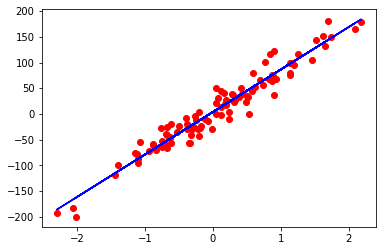

In [9]:
from numpy import random
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# 0) prepare data

x_numpy , y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0], 1)  #reshape the tensor

n_samples, n_features = X.shape


# 1) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


# 3) Loss and optimizer
learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 4) training loop

num_epochs = 100 

for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, Y)

  # Backward pass
  loss.backward()

  # Update
  optimizer.step()

  # Empty gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss= {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()  #detach the graph

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()



# Logistic Regresion

1) Design model (Input, Output size, foward pass) \
2) Contruct loss and optimizer \
3) Training loop: 
  - foward pass: compute prediction
  - backward pass: gradients
  - update weights

In [16]:
import torch
import torch.nn as N
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

#print(n_samples, n_features)
#print(list(bc.target_names))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

#Scale
sc = StandardScaler()   # 0 mean and 1 Standard deviation
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Transform
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#Reshape
y_train = y_train.view(y_train.shape[0], 1)   #reshape tensor to specific size
y_test = y_test.view(y_test.shape[0], 1) 


# 1) Model
# f = wx + b, sigmoid at the end

class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1) #just one output node for 2 classes

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
n_epochs = 200

for epoch in range(n_epochs):
  #forward pass and loss
  y_predicted= model(X_train)
  loss = criterion(y_predicted, y_train)
  #barckward pass
  loss.backward()
  #update
  optimizer.step()
  #empty gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss= {loss.item():.4f}')


with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()  # round the output to 0 or 1
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) # positive prediction / number of samples,   the sum() add 1 when y_pred and y_test are eq (equal)
  print(f'accuracy= {acc:.4f}')





epoch: 10, loss= 0.6150
epoch: 20, loss= 0.4964
epoch: 30, loss= 0.4240
epoch: 40, loss= 0.3752
epoch: 50, loss= 0.3400
epoch: 60, loss= 0.3131
epoch: 70, loss= 0.2918
epoch: 80, loss= 0.2744
epoch: 90, loss= 0.2599
epoch: 100, loss= 0.2476
epoch: 110, loss= 0.2369
epoch: 120, loss= 0.2276
epoch: 130, loss= 0.2194
epoch: 140, loss= 0.2120
epoch: 150, loss= 0.2054
epoch: 160, loss= 0.1994
epoch: 170, loss= 0.1940
epoch: 180, loss= 0.1890
epoch: 190, loss= 0.1844
epoch: 200, loss= 0.1801
accuracy= 0.9035


# Dataset and Dataloader

## Wine Dataset: 

- first column: wine class
- other columns: features 

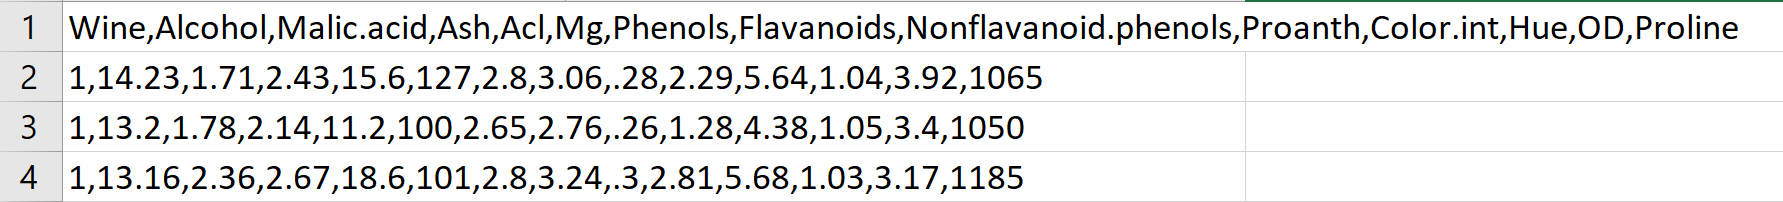

(n_samples/batch_size) * iterations = n_epochs

In [49]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
  def __init__(self, path):
    #data loading
    xy = np.loadtxt(path, delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
    self.y = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]

  def __len__(self):
    # len(dataset)
    return self.n_samples

dataset = WineDataset(path='wine.csv')

dataloader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
#print(features, labels)


#Training loop

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)


for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
    # Run your training process
    if (i+1) % 5 ==0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs{inputs.shape}')




epoch 1/2, step 5/45, inputstorch.Size([4, 13])
epoch 1/2, step 10/45, inputstorch.Size([4, 13])
epoch 1/2, step 15/45, inputstorch.Size([4, 13])
epoch 1/2, step 20/45, inputstorch.Size([4, 13])
epoch 1/2, step 25/45, inputstorch.Size([4, 13])
epoch 1/2, step 30/45, inputstorch.Size([4, 13])
epoch 1/2, step 35/45, inputstorch.Size([4, 13])
epoch 1/2, step 40/45, inputstorch.Size([4, 13])
epoch 1/2, step 45/45, inputstorch.Size([2, 13])
epoch 2/2, step 5/45, inputstorch.Size([4, 13])
epoch 2/2, step 10/45, inputstorch.Size([4, 13])
epoch 2/2, step 15/45, inputstorch.Size([4, 13])
epoch 2/2, step 20/45, inputstorch.Size([4, 13])
epoch 2/2, step 25/45, inputstorch.Size([4, 13])
epoch 2/2, step 30/45, inputstorch.Size([4, 13])
epoch 2/2, step 35/45, inputstorch.Size([4, 13])
epoch 2/2, step 40/45, inputstorch.Size([4, 13])
epoch 2/2, step 45/45, inputstorch.Size([2, 13])


# Dataset Transform

In [2]:
import torch
import torchvision

dataset = torchvision.datasets.MNIST(root="content/", download=True, transform=)

SyntaxError: ignored

In [13]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset):
  def __init__(self, path, transform=None):
    #data loading
    xy = np.loadtxt(path, delimiter=",", dtype=np.float32, skiprows=1)
    self.x = xy[:, 1:] # size [n_samples, n_features]
    self.y = xy[:, [0]] # size [n_samples, 1]
    self.n_samples = xy.shape[0]
    self.transform = transform

  def __getitem__(self, index):
    # dataset[0]
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)

    return sample

  def __len__(self):
    # len(dataset)
    return self.n_samples


# How to make the transform
class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, targets = sample
    inputs *= self.factor
    return inputs, targets



dataset = WineDataset(path='wine.csv', transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
#print(type(features), type(labels))
print(f'features =  {features}')


# How to create a composed transform (multiple transformation)
composed = torchvision.transforms.Compose([ ToTensor(), MulTransform(2) ])
dataset = WineDataset(path='wine.csv',transform = composed)
first_data = dataset[0]
features, labels = first_data
#print(type(features), type(labels))
print(f'features * 2 (MulTransform)=  {features}')

features =  tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
features * 2 (MulTransform)=  tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])


# Softmax and Crossentropy

## Binary classification

In [ ]:
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()


## Multiclass problem

In [24]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

# Activation Functions

 Model structure: 
 
 ```
 Class Model(nn.Module):
  def __init__(self, inputsize, hidden_size):
      # create function as nn.module 
      self.linear1 = nn.linear(input_size, hidden_size)
      self.relu = nn.ReLU()
      self.sigmoid = nn.Sigmoid()
      ....etc

  def forward(self,x):
      #create the structure of the model
      out = self.linear(x)
      out = self.relu(out)
      out = self. linear2(out)
      out = ......

      return out
```





In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out


## Optional

Use activation functions directly in forward pass

In [ ]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out